First 5 rows of dataset:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixe

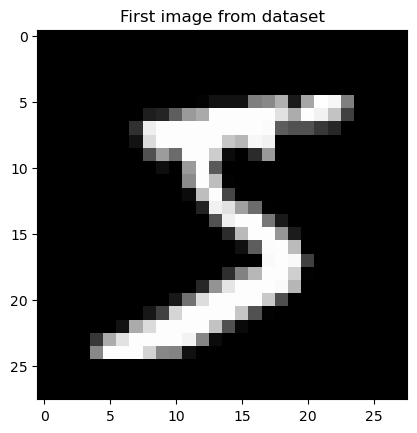


First 5 images from dataset:


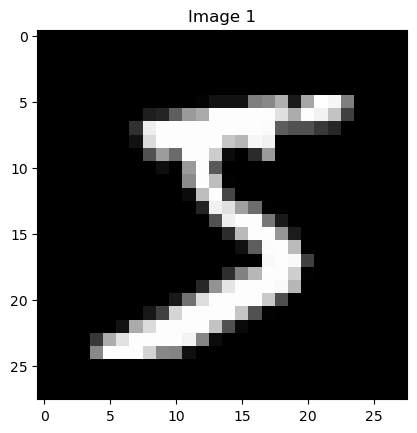

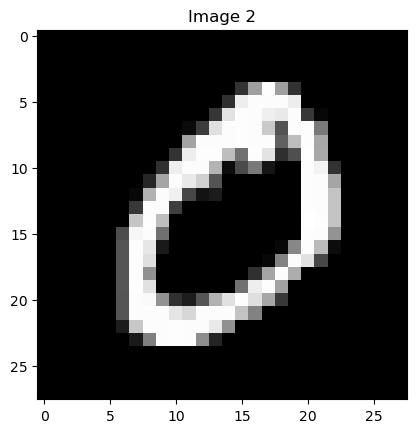

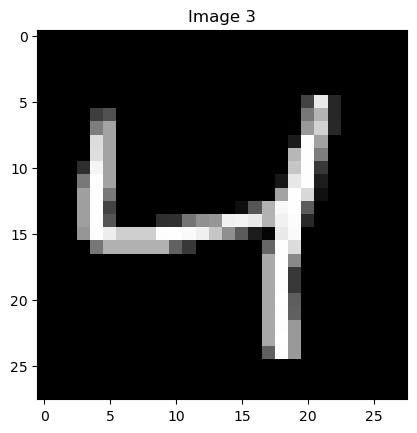

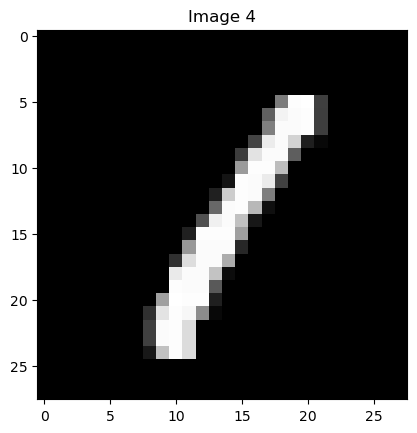

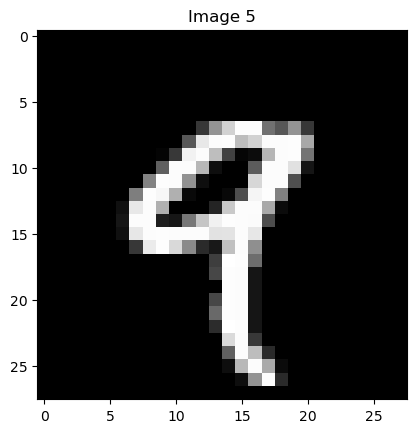


Shape of subset dataset: (30000, 784)

Number of samples for each class:
target
1    3381
7    3185
3    3029
9    3029
2    3004
6    2975
0    2967
8    2887
4    2844
5    2699
Name: count, dtype: int64


KeyboardInterrupt: 

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target

print("First 5 rows of dataset:")
print(X_mnist.head())

print("\nLast 5 rows of dataset:")
print(X_mnist.tail())

print("\nNumber of features:", X_mnist.shape[1])
print("Number of samples:", X_mnist.shape[0])

unique_classes = len(y_mnist.unique())
print(f"\nNumber of unique classes: {unique_classes}")

first_image = X_mnist.iloc[0].values.reshape(28, 28)
plt.imshow(first_image, cmap='gray')
plt.title("First image from dataset")
plt.show()

print("\nFirst 5 images from dataset:")
for i in range(5):
    image = X_mnist.iloc[i].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.show()

mnist_df = pd.DataFrame(X_mnist)
mnist_df['target'] = y_mnist
mnist_subset = mnist_df.sample(n=30000, random_state=42)

X_mnist_subset = mnist_subset.drop(columns=['target'])
y_mnist_subset = mnist_subset['target']

print("\nShape of subset dataset:", X_mnist_subset.shape)

class_counts = y_mnist_subset.value_counts()
print("\nNumber of samples for each class:")
print(class_counts)

X_train, X_test, y_train, y_test = train_test_split(X_mnist_subset, y_mnist_subset, test_size=0.3, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy

models = {
    'SVM (Linear Kernel)': SVC(kernel='linear'),
    'SVM (RBF Kernel)': SVC(kernel='rbf'),
    'Decision Tree (max depth=10)': DecisionTreeClassifier(max_depth=10),
    'KNN (n_neighbors=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest (n_estimators=100)': RandomForestClassifier(n_estimators=100)
}

train_accuracies = []
test_accuracies = []

for model_name, model in models.items():
    train_acc, test_acc = evaluate_model(model, X_train, X_test, y_train, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"\n{model_name}:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(10, 5))
plt.bar(models.keys(), train_accuracies, color='blue')
plt.title('Training Accuracies of Models')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models.keys(), test_accuracies, color='green')
plt.title('Test Accuracies of Models')
plt.xticks(rotation=45, ha='right')
plt.show()

best_model_index = test_accuracies.index(max(test_accuracies))
best_model = list(models.keys())[best_model_index]
print(f"\nThe best model: {best_model} based on test accuracy.")

print("\nDiscussion:")
print("1. The SVM with the RBF kernel outperformed the linear kernel due to its ability to capture non-linear patterns.")
print("2. Decision trees are prone to overfitting; however, Random Forest mitigates this issue by averaging the outputs of numerous trees.")
print("3. According to the test accuracy, either Random Forest or SVM with an RBF kernel would be favored.")
